In [1]:
import numpy as np 
import pandas as pd
import pylab as pl 
import scipy.stats as st# set seed 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
np.random.seed(100)

In [68]:
#creating the collection of poisson samples
size=1000
mean=500

In [69]:
sample=[]
for i in range(0,size):
    sample.append(st.poisson.rvs(mean,size=size))

In [70]:
#the original population that contains the samples
original=[]
for i in range(0,size):
    for j in range(0,size):
        original.append(sample[i][j])

In [71]:
original=np.array(original)

In [72]:
print(original.mean(),original.std())

(499.99375900000001, 22.348689403406166)


In [73]:
#naming a function that calculates the z-score
def calculate_z(dist):
    z = (np.sqrt(len(dist))*(original.mean() - dist.mean()))/(original.std())
    return z
z_values = np.empty(size)
for i in range(0,size):
    z_values[i]=calculate_z(sample[i])

In [74]:
print(z_values.mean(),z_values.std())

(1.7291945653141739e-14, 0.980447455279149)


#### Creating the histograms

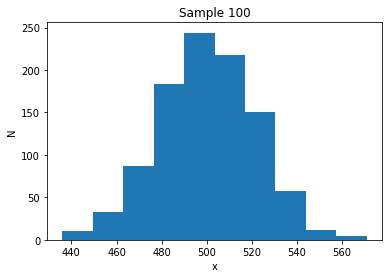

In [80]:
pl.hist(sample[100]);
pl.xlabel('x')
pl.ylabel('N')
pl.title('Sample 100')

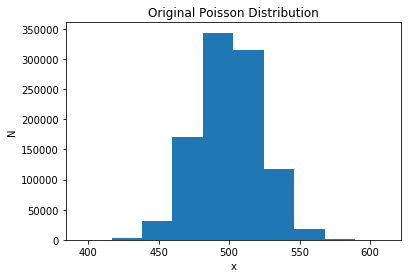

In [76]:
pl.hist(original);
pl.xlabel('x')
pl.ylabel('N')
pl.title('Original Poisson Distribution')

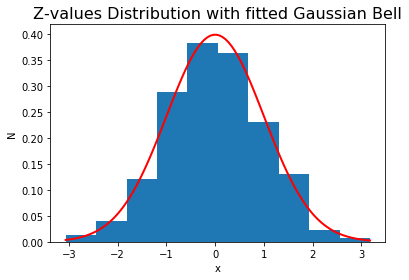

In [115]:
pl.hist(z_values,normed=True);
pl.xlabel('x')
pl.ylabel('N')
pl.title('Z-values Distribution with fitted Gaussian Bell',fontsize=16)
#fitting a gaussian bell curve
x = np.linspace(min(z_values), max(z_values), 100)
p = st.norm.pdf(x, 0, 1)
pl.plot(x, p, 'k', linewidth=2, color = 'red', label='N(0,1)')

In [83]:
st.kstest(z_values, 'norm')

KstestResult(statistic=0.017996224578278347, pvalue=0.90237887575467957)

#### Final p-value of 0.90